INITIALIZING THE MODULES BY IMPORTING IT FROM RESPECTED LIBRARY

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MLT_project_data/osteoporosis.csv")
df

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,1991635,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0
1954,1528601,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,1990957,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,1779848,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


EXPLORATORY DATA ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal_Changes     1958 non-null   object
 4   Family_History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body_Weight          1958 non-null   object
 7   Calcium_Intake       1958 non-null   object
 8   Vitamin_D_Intake     1958 non-null   object
 9   Physical_Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol_Consumption  970 non-null    object
 12  Medical_Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior_Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

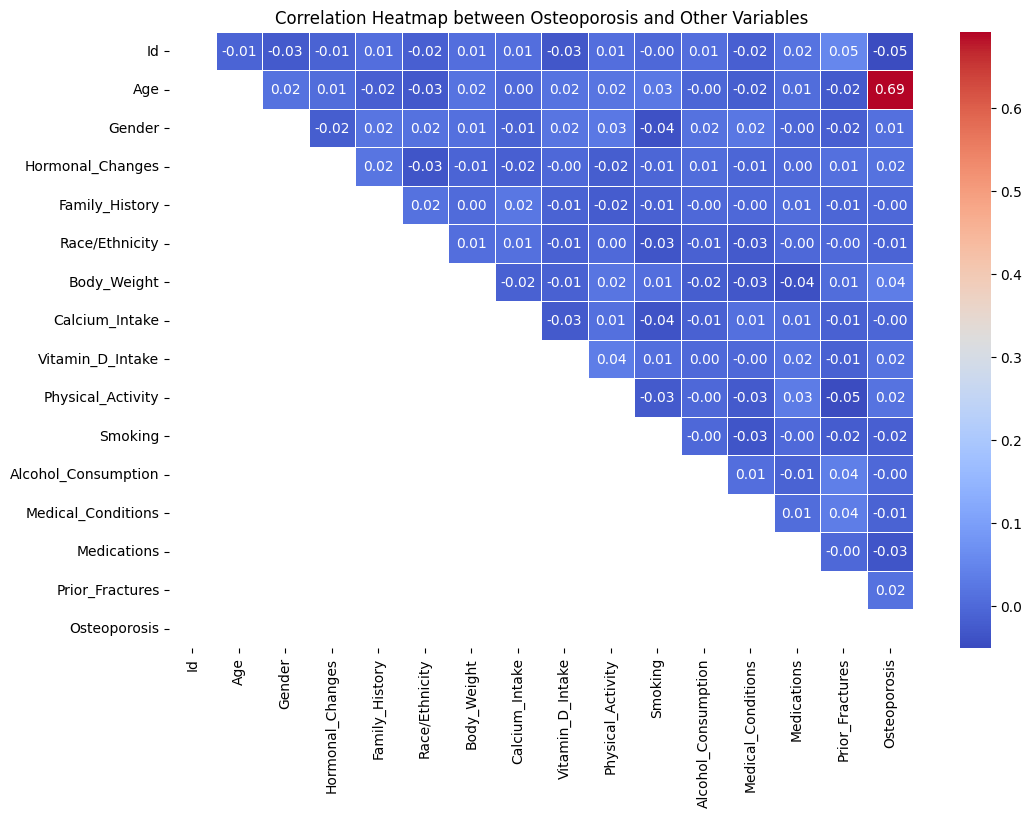

In [ ]:
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Osteoporosis and Other Variables')
plt.show()

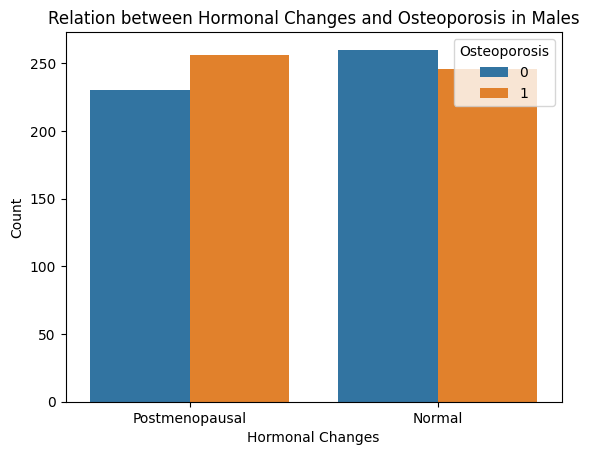

In [ ]:
male_df = df[df['Gender'] == 'Male']
sns.countplot(data=male_df, x='Hormonal Changes', hue='Osteoporosis')
plt.title('Relation between Hormonal Changes and Osteoporosis in Males')
plt.xlabel('Hormonal Changes')
plt.ylabel('Count')
plt.show()

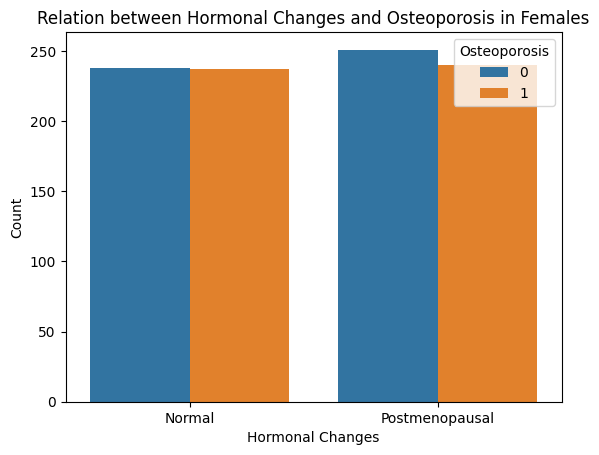

In [ ]:
female_df = df[df['Gender'] == 'Female']
sns.countplot(data=female_df, x='Hormonal_Changes', hue='Osteoporosis')
plt.title('Relation between Hormonal Changes and Osteoporosis in Females')
plt.xlabel('Hormonal Changes')
plt.ylabel('Count')
plt.show()

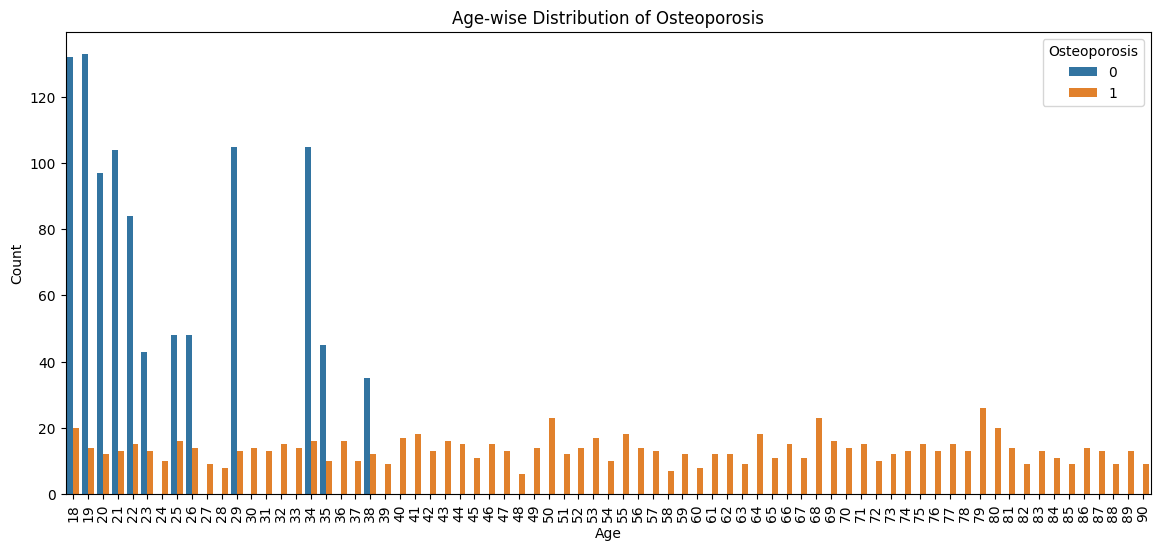

In [ ]:
# Sort the DataFrame by age in ascending order
sorted_df = df.sort_values(by='Age')

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot the age-wise distribution of osteoporosis
sns.countplot(data=sorted_df, x='Age', hue='Osteoporosis')
plt.title('Age-wise Distribution of Osteoporosis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

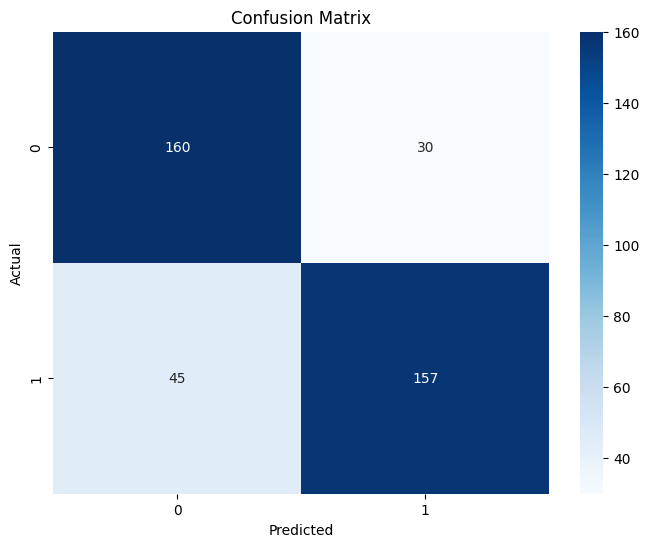

In [ ]:
# Split the data into features (X) and target variable (y)
X = sorted_df[['Age']]
y = sorted_df['Osteoporosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Figure size 1000x600 with 0 Axes>

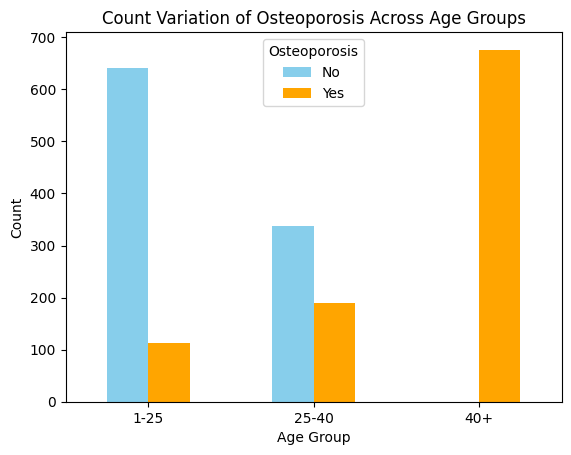

In [ ]:
# Define the age groups
def categorize_age(age):
    if age <= 25:
        return '1-25'
    elif 25 < age <= 40:
        return '25-40'
    else:
        return '40+'

# Apply the categorization function to create a new column 'Age_Group'
df['Age_Group'] = df['Age'].apply(categorize_age)

# Calculate the count of individuals with osteoporosis in each age group
age_osteo_count = df.groupby(['Age_Group', 'Osteoporosis']).size().unstack()

# Plot the multiple bar graph
plt.figure(figsize=(10, 6))
age_osteo_count.plot(kind='bar', stacked=False, color=['skyblue', 'orange'])
plt.title('Count Variation of Osteoporosis Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Osteoporosis', labels=['No', 'Yes'])
plt.show()


<Figure size 1000x600 with 0 Axes>

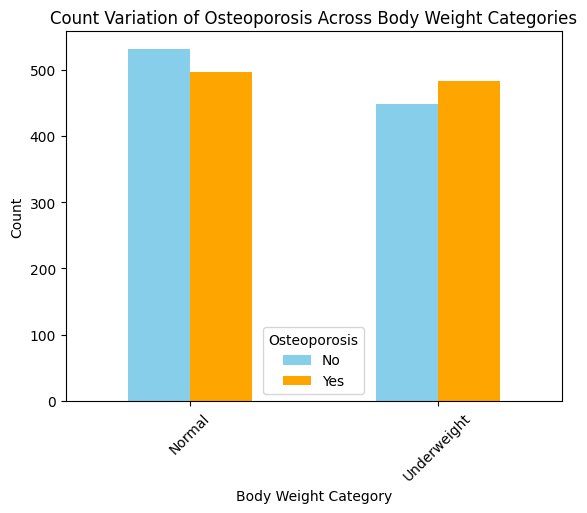

In [ ]:
# Calculate the count of individuals with osteoporosis in each body weight category
weight_osteo_count = df.groupby(['Body Weight', 'Osteoporosis']).size().unstack()

# Plot the multiple bar graph
plt.figure(figsize=(10, 6))
weight_osteo_count.plot(kind='bar', stacked=False, color=['skyblue', 'orange'])
plt.title('Count Variation of Osteoporosis Across Body Weight Categories')
plt.xlabel('Body Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Osteoporosis', labels=['No', 'Yes'])
plt.show()

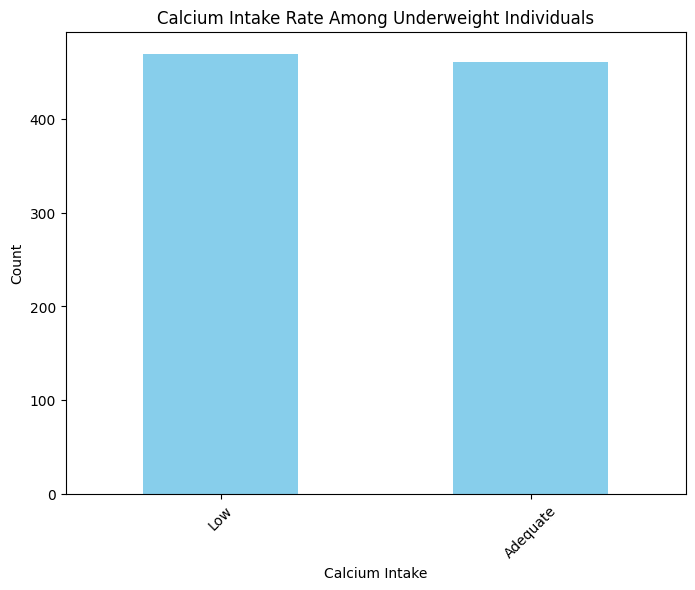

In [ ]:
# Filter the dataset to include only underweight individuals
underweight_df = df[df['Body Weight'] == 'Underweight']

# Calculate the count of different calcium intake levels for underweight individuals
calcium_count = underweight_df['Calcium Intake'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
calcium_count.plot(kind='bar', color='skyblue')
plt.title('Calcium Intake Rate Among Underweight Individuals')
plt.xlabel('Calcium Intake')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

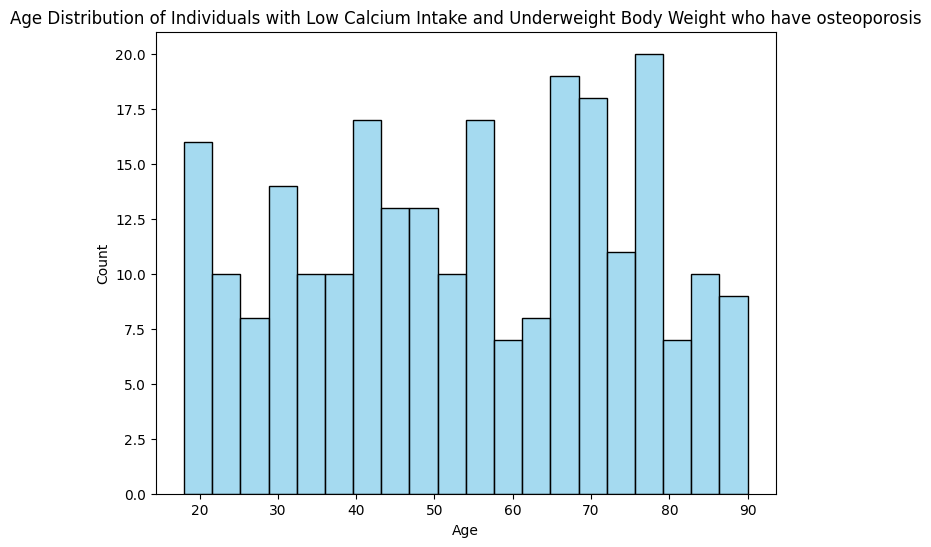

In [ ]:
# Filter the dataset to include only individuals with low calcium intake and underweight body weight
filtered_df = df[(df['Calcium Intake'] == 'Low') & (df['Body Weight'] == 'Underweight') & (df['Osteoporosis'] == 1)]

# Plot the histogram to visualize age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_df, x='Age', bins=20, color='skyblue', kde=False)
plt.title('Age Distribution of Individuals with Low Calcium Intake and Underweight Body Weight who have osteoporosis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



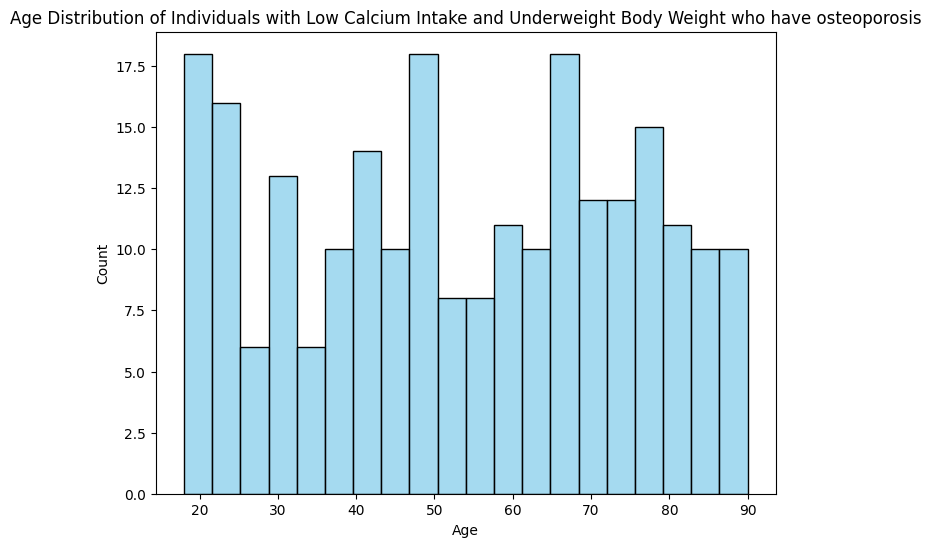

In [ ]:
# Filter the dataset to include only individuals with low calcium intake and underweight body weight
filtered_df = df[(df['Vitamin D Intake'] == 'Insufficient') & (df['Body Weight'] == 'Normal') & (df['Osteoporosis'] == 1)]

# Plot the density plot to visualize age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_df, x='Age', bins=20, color='skyblue', kde=False)
plt.title('Age Distribution of Individuals with Low Vitamin D Intake and Underweight Body Weight who have osteoporosis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

DATA PREPROCESSING

In [ ]:
df = df.rename(columns={
    "Hormonal Changes": "Hormonal_Changes",
    "Family History" : "Family_History",
    "Body Weight" : "Body_Weight",
    "Calcium Intake" : "Calcium_Intake",
    "Vitamin D Intake" : "Vitamin_D_Intake",
    "Physical Activity" : "Physical_Activity",
    "Alcohol Consumption" : "Alcohol_Consumption",
    "Medical Conditions" : "Medical_Conditions",
    "Prior Fractures" : "Prior_Fractures",
})
df

,Id,Age,Gender,Hormonal_Changes,Family_History,Race/Ethnicity,Body_Weight,Calcium_Intake,Vitamin_D_Intake,Physical_Activity,Smoking,Alcohol_Consumption,Medical_Conditions,Medications,Prior_Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,1991635,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0
1954,1528601,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,1990957,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,1779848,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [ ]:
# Assuming df is your DataFrame containing the data
# Loop through each column
for col in df.columns:
    # Check if the column has dtype object
    if df[col].dtype == 'object':
        # Initialize LabelEncoder
        le = LabelEncoder()
        # Fit and transform the column
        df[col] = le.fit_transform(df[col])

df.head(10)

,Id,Age,Gender,Hormonal_Changes,Family_History,Race/Ethnicity,Body_Weight,Calcium_Intake,Vitamin_D_Intake,Physical_Activity,Smoking,Alcohol_Consumption,Medical_Conditions,Medications,Prior_Fractures,Osteoporosis
0,1734616,69,0,0,1,1,1,1,1,1,1,0,1,0,1,1
1,1419098,32,0,0,1,1,1,1,1,1,0,1,2,1,1,1
2,1797916,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,1805337,78,0,0,0,2,1,0,0,1,1,1,1,0,0,1
4,1351334,38,1,1,1,0,0,1,1,0,1,1,1,1,1,1
5,1799320,41,1,0,1,2,0,1,1,0,1,0,1,0,1,1
6,1577644,20,1,1,1,0,1,0,1,1,0,1,1,1,0,1
7,1443912,39,1,1,1,1,0,0,1,1,0,1,1,0,1,1
8,1379331,70,1,1,0,1,1,1,1,0,1,1,1,0,0,1
9,1824991,19,0,0,0,0,0,1,1,0,1,0,2,0,1,1


In [ ]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_normalized = df_normalized.drop(['Id','Family_History'	,'Race/Ethnicity','Smoking','Alcohol_Consumption','Medications','Prior_Fractures'], axis=1)

df_normalized.head()

,Age,Gender,Hormonal_Changes,Body_Weight,Calcium_Intake,Vitamin_D_Intake,Physical_Activity,Medical_Conditions,Osteoporosis
0,0.708333,0.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0
1,0.194444,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.986111,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.833333,0.0,0.0,1.0,0.0,0.0,1.0,0.5,1.0
4,0.277778,1.0,1.0,0.0,1.0,1.0,0.0,0.5,1.0


PREDICTION MODEL USING ENSEMBLE METHOD

In [ ]:
from sklearn.ensemble import VotingClassifier

X = df_normalized.drop(['Osteoporosis'], axis=1)
y = df_normalized['Osteoporosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the individual classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Support Vector Classifier", SVC()),
    ("Gradient Boosting Classifier", GradientBoostingClassifier()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("AdaBoost Classifier", AdaBoostClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("MLP Classifier", MLPClassifier())
]

# Initialize the VotingClassifier
voting_clf = VotingClassifier(estimators=classifiers, voting='hard')

# Train and evaluate the VotingClassifier
voting_clf.fit(X_train_scaled, y_train)
accuracy = voting_clf.score(X_test_scaled, y_test)

print(f"Voting Classifier Accuracy: {accuracy * 100:.2f}%")



Voting Classifier Accuracy: 87.07%


Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88       285
         1.0       0.97      0.78      0.86       303

    accuracy                           0.87       588
   macro avg       0.88      0.87      0.87       588
weighted avg       0.89      0.87      0.87       588



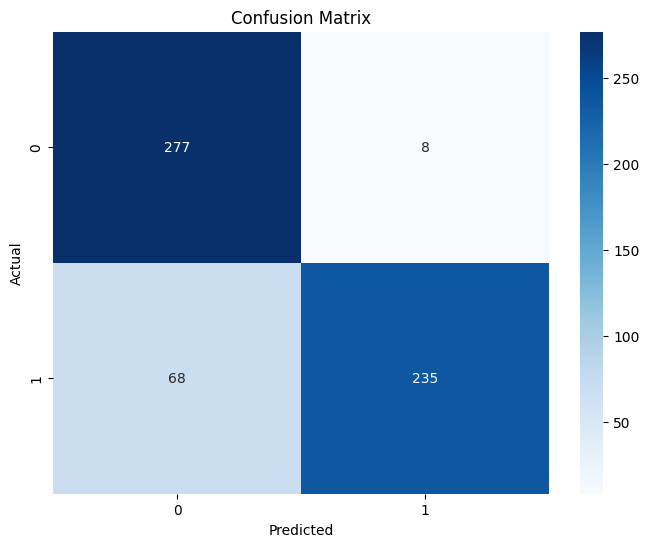


Confusion Matrix:
[[277   8]
 [ 68 235]]


In [ ]:
# Predict on the test set
y_pred = voting_clf.predict(X_test_scaled)

# Calculate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\nConfusion Matrix:")
print(cm)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Define the individual classifiers with DecisionTreeClassifier
classifiers = [
    ("Decision Tree", DecisionTreeClassifier()),  # Replacing LogisticRegression with DecisionTreeClassifier
    ("Support Vector Classifier", SVC()),
    ("Gradient Boosting Classifier", GradientBoostingClassifier()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("AdaBoost Classifier", AdaBoostClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("MLP Classifier", MLPClassifier())
]

# Initialize the VotingClassifier
voting_clf = VotingClassifier(estimators=classifiers, voting='hard')

# Train and evaluate the VotingClassifier
voting_clf.fit(X_train_scaled, y_train)
accuracy = voting_clf.score(X_test_scaled, y_test)

print(f"Voting Classifier Accuracy: {accuracy * 100:.2f}%")

# Extract a single decision tree from the VotingClassifier
estimator = voting_clf.estimators_[0]

# Export the decision tree to a Graphviz file
dot_data = export_graphviz(estimator,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           feature_names=X.columns.tolist(),
                           class_names=['No Osteoporosis', 'Osteoporosis'])

# Display the decision tree
graph = graphviz.Source(dot_data)
graph.render('voting_classifier_tree', format='png', cleanup=True)


Voting Classifier Accuracy: 87.59%


'voting_classifier_tree.png'

In [ ]:
# To export the model if needed
joblib.dump(voting_clf, '/content/drive/MyDrive/MLT_project_data/voting_classifier_model.pkl')